In [7]:
# (V_d,h_dot,I) for a single dot

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

import dot_classifier
reload(dot_classifier)
import dot_classifier_tf
reload(dot_classifier_tf)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import potential_profile
reload(potential_profile)
import tunneling
reload(tunneling)
import rank_nullspace
reload(rank_nullspace)
%pdb

import time

st = time.time()
N_v_points = 100
V_d_vec = np.linspace(123e-3,119e-3,N_v_points)

N_grid= 100
x = np.linspace(-1,1,N_grid)
K = thomas_fermi.create_K_matrix(x,E_scale=0.0001,sigma= (x[1] - x[0]))

battery_ind = []
max_prob_node = []

h_d_points = 25
h_d_vec = np.linspace(0.08,0.11,h_d_points)

I_vec = np.zeros((h_d_points,N_v_points))
charge_state = np.zeros((h_d_points,N_v_points))

for i in range(h_d_points):
    print i
    for j in range(N_v_points):
        d = (V_d_vec[j],0,h_d_vec[i],1)
        b1 = (-100e-3,0.3,0.1,1)
        b2 = (-100e-3,-0.3,0.1,1)

        V = potential_profile.single_dot_V_x_wire(x,d,b1,b2)                       
        mu_l = (0.05,0.05+0.001)
    
        graph_model = (25,1)
        battery_weight = 200
        kT = 100e-6
        physics = (x,V,K,mu_l,battery_weight,kT)

        if(j==0):
            G = markov_graph.generate_graph(graph_model, physics)
            battery_ind = markov_graph.get_battery_nodes(G)
            max_prob_node_trial  = markov_graph.get_max_prob_node(G)[0][1]
            graph_model = (max_prob_node_trial,1)
            print h_d_vec[i],graph_model
            G = markov_graph.generate_graph(graph_model, physics)
            battery_ind = markov_graph.get_battery_nodes(G)
        else:
            G = markov_graph.recalculate_weights(G,physics)  
   
        I_vec[i,j] = markov_graph.get_current(G,battery_ind)
        charge_state[i,j] = markov_graph.get_max_prob_node(G)[0][1]


Automatic pdb calling has been turned ON
0
0.08 (15, 1)
1
0.08125 (14, 1)
2
0.0825 (14, 1)
3
0.08375 (13, 1)
4
0.085 (13, 1)
5
0.08625 (12, 1)
6
0.0875 (11, 1)
7
0.08875 (11, 1)
8
0.09 (10, 1)
9
0.09125 (9, 1)
10
0.0925 (9, 1)
11
0.09375 (8, 1)
12
0.095 (8, 1)
13
0.09625 (7, 1)
14
0.0975 (7, 1)
15
0.09875 (6, 1)
16
0.1 (5, 1)
17
0.10125 (5, 1)
18
0.1025 (4, 1)
19
0.10375 (4, 1)
20
0.105 (3, 1)
21
0.10625 (2, 1)
22
0.1075 (2, 1)
23
0.10875 (1, 1)
24
0.11 (1, 1)


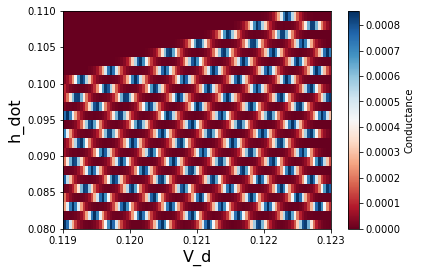

In [23]:
XX,YY = np.meshgrid(V_d_vec,h_d_vec) 
plt.pcolor(XX,YY,I_vec,cmap='RdBu')
plt.colorbar(label='Conductance')
plt.xlabel('V_d',fontsize=16)
plt.ylabel('h_dot',fontsize=16)

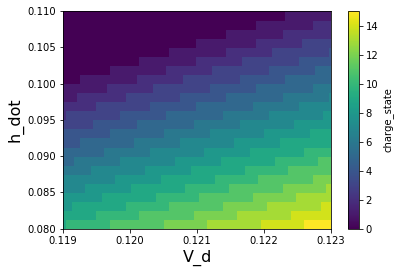

In [22]:
XX,YY = np.meshgrid(V_d_vec,h_d_vec) 
plt.pcolor(XX,YY,charge_state)
plt.colorbar(label='charge_state')
plt.xlabel('V_d',fontsize=16)
plt.ylabel('h_dot',fontsize=16)